# An End to End Toy Recognition  (between kiki and miki)

#### Step 1: Build  Image Data  for at least 2 people and Name Them with their Names.

In [24]:
# Your Code Here 
import cv2
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt

def takephoto( ):
    objname =input("please input object name")
   
    cap =cv2.VideoCapture(0)
    os.mkdir(objname)
    i = 0
    while(1):
        ret,frame = cap.read()  
        cv2.imshow('Live',frame)
        if cv2.waitKey(10) & 0xFF == ord('g'):  #" Press g to save the image then q to close"
            cv2.imwrite(objname+'/'+objname+str(i)+'.jpg',frame)
            i +=1
            print(i)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break                                                                          
    cap.release()                             
    cv2.destroyAllWindows()
    

In [25]:
takephoto()


please input object namemiky
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [26]:
takephoto()

please input object namekiky
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


#### Step 2: Load The Data , Normalize them and resize them to (224,224,3)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/courses/Electro Pi/Computer vision/high level/2-cnn/Dataset_TOY/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/courses/Electro Pi/Computer vision/high level/2-cnn/Dataset_TOY/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


#### Step 3: Create Labels list  for example  [0,0,0,0,0,....,1,1,1,1,1]

In [2]:
import os
import pandas as pd 

filenames = os.listdir("D:/courses/Electro Pi/Computer vision/high level/2-cnn/Dataset1/Train")
categories = []
for filename in filenames:
    if filename.startswith('m'):
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [3]:
df.head() #for display


,filename,category
0,kiky0.jpg,0
1,kiky1.jpg,0
2,kiky10.jpg,0
3,kiky11.jpg,0
4,kiky12.jpg,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  200 non-null    object
 1   category  200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


#### Step 4: Check if both classes are same count

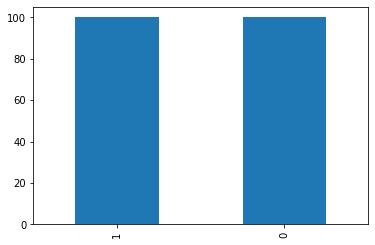

In [5]:
df['category'].value_counts().plot.bar()


#### Step 5: Build Your Convolutional Neural Network.

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(256, (3, 3), input_shape = (64,64,3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(128, (4, 4), activation = 'relu'))
# Pooling

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())


#### Step 6: Compile , Train , Evaluate your Model

In [7]:
# Step 4 - Full connection
classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       524416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [8]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 1)


C:\Users\HASHOMA\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 10s 2s/step - loss: 1.0178 - accuracy: 0.5896 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 8s 2s/step - loss: 0.7006 - accuracy: 0.4762 - val_loss: 0.6844 - val_accuracy: 0.6000
Epoch 3/15
5/5 [==============================] - 8s 2s/step - loss: 0.6754 - accuracy: 0.5318 - val_loss: 0.6493 - val_accuracy: 0.8500
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 0.6481 - accuracy: 0.6511 - val_loss: 0.5740 - val_accuracy: 0.6500
Epoch 5/15
5/5 [==============================] - 8s 2s/step - loss: 0.5133 - accuracy: 0.7658 - val_loss: 0.3295 - val_accuracy: 0.9500
Epoch 6/15
5/5 [==============================] - 8s 2s/step - loss: 0.3402 - accuracy: 0.9263 - val_loss: 0.2744 - val_accuracy: 0.9000
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 0.3427 - accuracy: 0.8854 - val_loss: 0.2003 - val_accuracy: 1.0000
Epoch 8/15
5/5 [========================

In [9]:
classifier.save

<bound method Model.save of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002963F469F70>>

#### Step 7: Inference Stage Let it be test !

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('D:/courses/Electro Pi/Computer vision/high level/2-cnn/Dataset1/Train/miky1.jpg', target_size = (64, 64))
print(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = '1'
else:
    prediction = '2'
    
print(prediction)

<PIL.Image.Image image mode=RGB size=64x64 at 0x2963F64F430>
1
